DATASET USED: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation/


In [ ]:
import os
import shutil

# Define the source directory where you want to search for image files.
source_dir = "D:/braincancer/kaggle_3m"

# Define the destination directory where you want to move the image files.
destination_dir = "D:/braincancer/mask"

# Create the destination directory if it doesn't exist.
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Loop through all subdirectories and files in the source directory.
for root, _, files in os.walk(source_dir):
    for file in files:
        # Check if the file is an image and doesn't contain "_mask" in its name.
        if file.lower().endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tif")) and "_mask"  in file:
            # Build the source and destination file paths.
            source_file = os.path.join(root, file)
            destination_file = os.path.join(destination_dir, file)

            # Move the file to the destination directory.
            shutil.move(source_file, destination_file)
            print(f"Moved {file} to {destination_dir}")


Moved TCGA_CS_4941_19960909_10_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_11_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_12_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_13_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_14_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_15_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_16_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_17_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_18_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_19_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_1_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_20_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_21_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_22_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_23_mask.tif to D:/braincancer/mask
Moved TCGA_CS_4941_19960909_2_mask.tif to D:/braincancer

In [ ]:
import os
import numpy as np
import cv2

dir = 'D:/braincancer/mask'
output_dir = 'D:/braincancer/mask/png'

from PIL import Image
import os

# Set the folder containing TIFF files
tiff_folder = dir

# Set the folder to save the PNG files
png_folder = output_dir

# Ensure the PNG folder exists
if not os.path.exists(png_folder):
    os.makedirs(png_folder)

# Loop through the TIFF files and convert them to PNG
for tiff_file in os.listdir(tiff_folder):
    if tiff_file.endswith('.tif') or tiff_file.endswith('.tiff'):
        tiff_path = os.path.join(tiff_folder, tiff_file)
        png_path = os.path.join(png_folder, os.path.splitext(tiff_file)[0] + '.png')
        Image.open(tiff_path).save(png_path)

print("Conversion complete.")


Conversion complete.


In [ ]:
import os
import shutil

from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *


In [ ]:
path_im = Path('D:/braincancer/images/png')

path_lbl = Path('D:/braincancer/mask/png')
source_dir2=Path('D:/braincancer/mask/')

In [ ]:
fnames = get_image_files(path_im)
label_names = get_image_files(path_lbl)

In [ ]:

get_msk = lambda o: source_dir2/'png'/f'{o.stem}_mask{o.suffix}' #o is the filename of the mask



In [ ]:
fnames[0]

Path('D:/braincancer/images/png/TCGA_CS_4941_19960909_1.png')

In [ ]:
label_names[0]

Path('D:/braincancer/mask/png/TCGA_CS_4941_19960909_10_mask.png')

<Axes: >

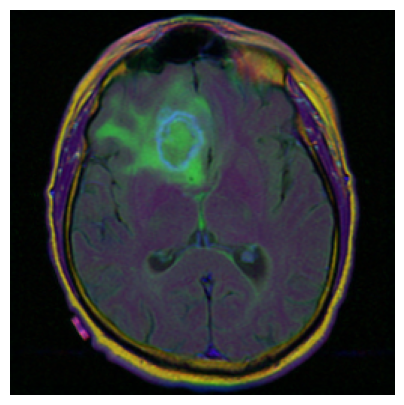

In [ ]:
img_fn = fnames[4]
img= PILImage.create(img_fn)

img.show()

<Axes: >

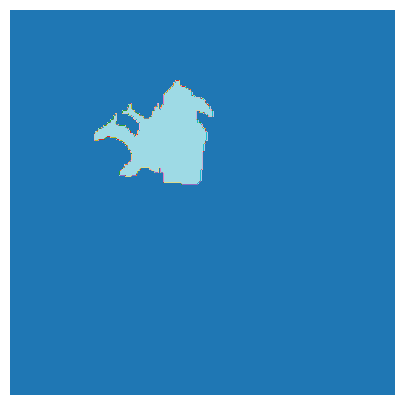

In [ ]:
mask = PILMask.create(get_msk(img_fn))
mask.show(alpha=1)

In [ ]:
print(tensor(mask))



tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)


In [ ]:
codes = ['n','y']

In [ ]:
sz= mask.shape; sz

(256, 256)

In [ ]:
half = tuple(int(x/2) for x in sz); half

(128, 128)

In [ ]:
cancer = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2),
get_y = get_msk,
batch_tfms=[*aug_transforms(size=half), Normalize.from_stats(*imagenet_stats),  IntToFloatTensor(div_mask=255)
])


In [ ]:
source_p=Path('D:/braincancer/images/png')

dls =  cancer.dataloaders(source_p,bs=64)

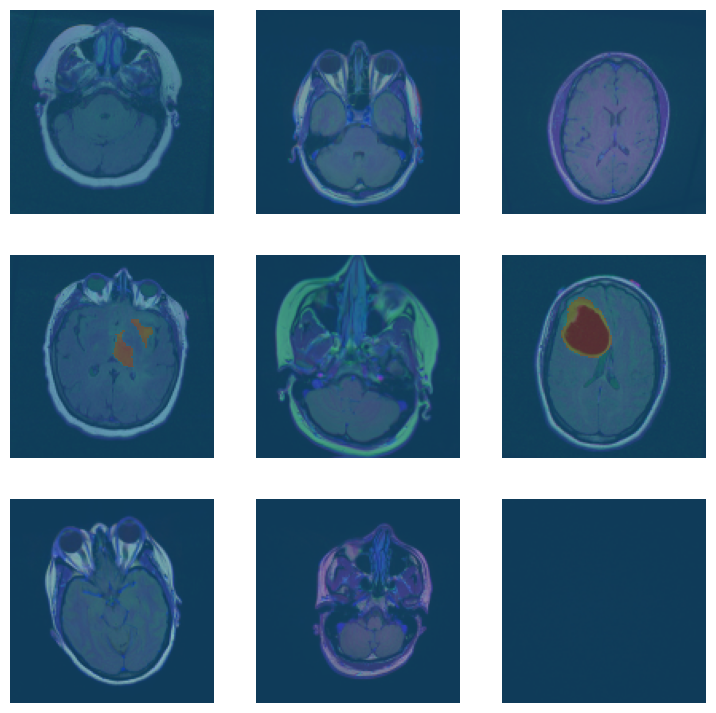

In [ ]:
dls.show_batch()

In [ ]:
dls.vocab = codes

dls.vocab

['n', 'y']

In [ ]:
name2id = {v:k for k,v in enumerate(codes)}

In [ ]:
name2id

{'n': 0, 'y': 1}

In [ ]:
opt=Adam

In [ ]:
learn = unet_learner(dls, resnet34)


In [ ]:
learn.summary()

DynamicUnet (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                     

In [ ]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,0.015856,0.014486,01:44


epoch,train_loss,valid_loss,time
0,0.010227,0.008962,01:53
1,0.009044,0.008099,01:48
2,0.008330,0.007615,01:59
3,0.007958,0.007148,02:10
4,0.006954,0.006240,01:55
5,0.006283,0.006044,01:48
6,0.005780,0.005938,01:47
7,0.005494,0.005794,01:49


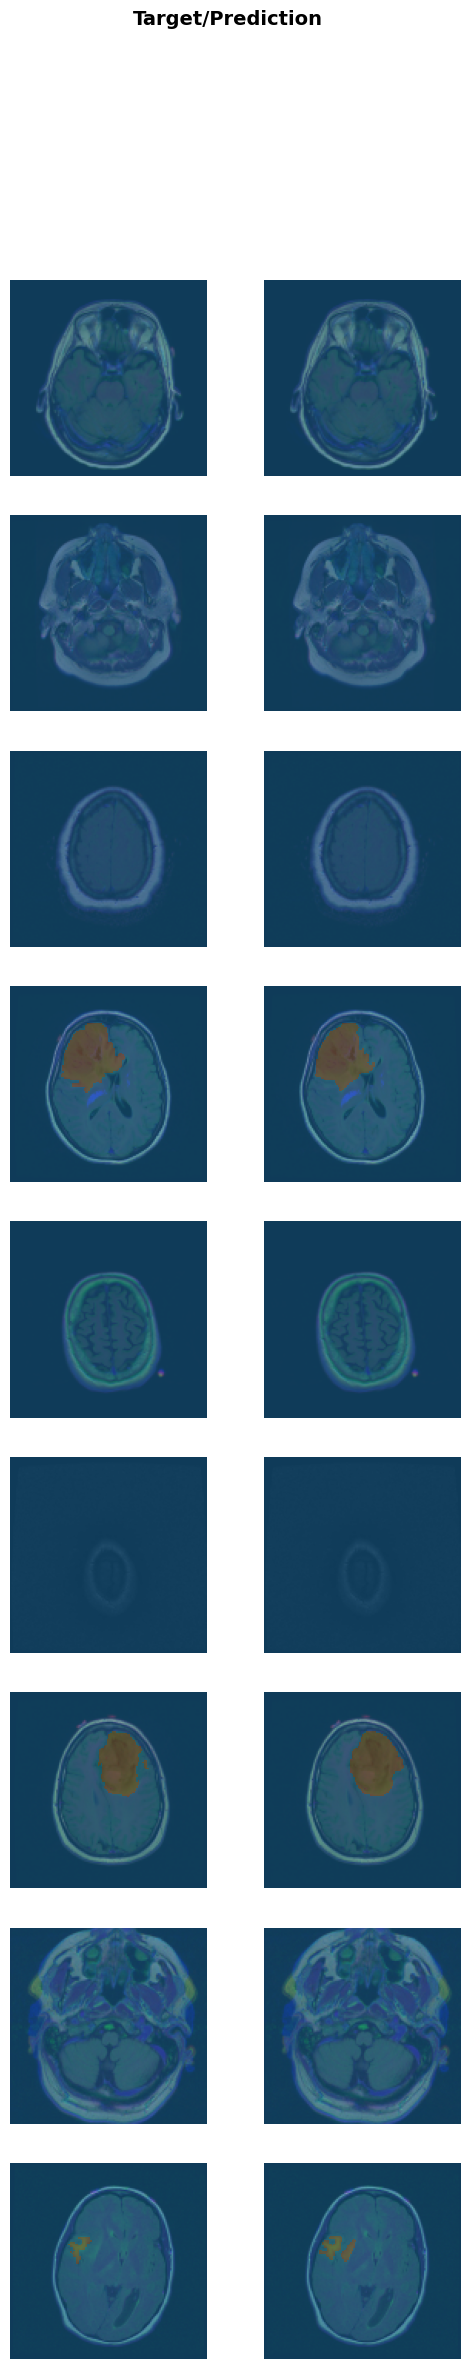

In [ ]:
learn.show_results()

In [ ]:
import os
import shutil

# Define the source directory.
source_dir = "D:/braincancer/TCGA_CS_4941_19960909"

# Define the destination directory.
destination_dir = "D:/braincancer/TCGA_CS_4941_19960909/testmsk"

# Create the destination directory if it doesn't exist.
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Loop through all subdirectories and files in the source directory.
for root, _, files in os.walk(source_dir):
    for file in files:
        # Check if the file is an image and doesn't contain "_mask" in its name.
        if file.lower().endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tif")) and "_mask"  in file:
            # Build the source and destination file paths.
            source_file = os.path.join(root, file)
            destination_file = os.path.join(destination_dir, file)

            # Move the file to the destination directory.
            shutil.move(source_file, destination_file)
            print(f"Moved {file} to {destination_dir}")

Moved TCGA_CS_4941_19960909_11_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_12_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_13_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_14_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_15_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_16_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_17_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_18_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_11_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_12_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_13_mask.tif to D:/braincancer/TCGA_CS_4941_19960909/testmsk
Moved TCGA_CS_4941_19960909_14_m

In [ ]:
import os
import numpy as np
import cv2

dir = 'D:/braincancer/TCGA_CS_4941_19960909/test'
output_dir = 'D:/braincancer/TCGA_CS_4941_19960909/test/png'

from PIL import Image
import os

# Set the folder containing TIFF files
tiff_folder = dir

# Set the folder where you want to save the PNG files
png_folder = output_dir

# Ensure the PNG folder exists
if not os.path.exists(png_folder):
    os.makedirs(png_folder)

# Loop through the TIFF files and convert them to PNG
for tiff_file in os.listdir(tiff_folder):
    if tiff_file.endswith('.tif') or tiff_file.endswith('.tiff'):
        tiff_path = os.path.join(tiff_folder, tiff_file)
        png_path = os.path.join(png_folder, os.path.splitext(tiff_file)[0] + '.png')
        Image.open(tiff_path).save(png_path)

print("Conversion complete.")


Conversion complete.


In [ ]:

test_dir = ('D:/braincancer/TCGA_CS_4941_19960909/test/png')

fnames = get_image_files(test_dir)

fnames

(#8) [Path('D:/braincancer/TCGA_CS_4941_19960909/test/png/TCGA_CS_4941_19960909_11.png'),Path('D:/braincancer/TCGA_CS_4941_19960909/test/png/TCGA_CS_4941_19960909_12.png'),Path('D:/braincancer/TCGA_CS_4941_19960909/test/png/TCGA_CS_4941_19960909_13.png'),Path('D:/braincancer/TCGA_CS_4941_19960909/test/png/TCGA_CS_4941_19960909_14.png'),Path('D:/braincancer/TCGA_CS_4941_19960909/test/png/TCGA_CS_4941_19960909_15.png'),Path('D:/braincancer/TCGA_CS_4941_19960909/test/png/TCGA_CS_4941_19960909_16.png'),Path('D:/braincancer/TCGA_CS_4941_19960909/test/png/TCGA_CS_4941_19960909_17.png'),Path('D:/braincancer/TCGA_CS_4941_19960909/test/png/TCGA_CS_4941_19960909_18.png')]

In [ ]:
dl = learn.dls.test_dl(fnames[:5])


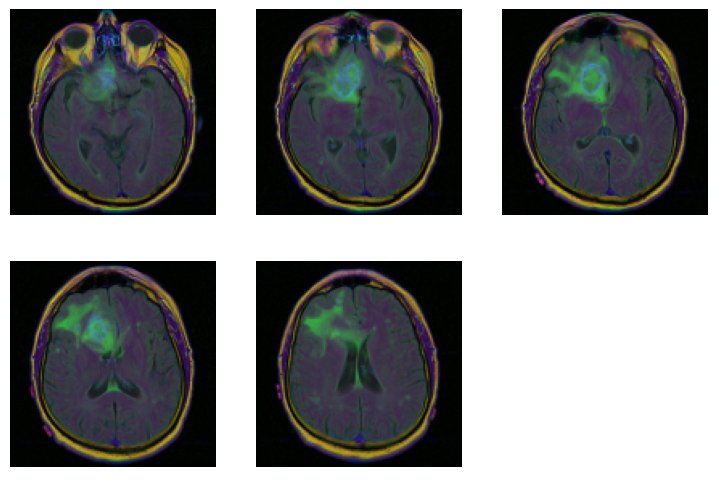

In [ ]:
dl.show_batch()


In [ ]:
preds = learn.get_preds(dl=dl)


In [ ]:
preds[0].shape


torch.Size([5, 2, 128, 128])

In [ ]:
len(codes)


2

In [ ]:
pred_1 = preds[0][0]


In [ ]:
pred_1.shape


torch.Size([2, 128, 128])

In [ ]:
pred_arx = pred_1.argmax(dim=0)


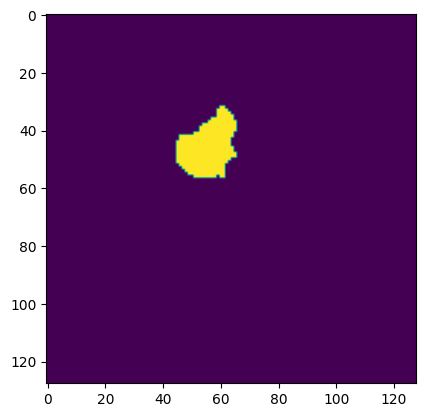

In [ ]:
plt.imshow(pred_arx)
